<a href="https://colab.research.google.com/github/Ramisrkit/Customer_Segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/content/Mall_Customers.csv')

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [6]:
df.duplicated().value_counts()

,count
False,200


In [8]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [9]:
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])

In [10]:
x=df

In [11]:
st=MinMaxScaler()
x=st.fit_transform(x)

In [12]:
x

array([[0.        , 1.        , 0.01923077, 0.        , 0.3877551 ],
       [0.00502513, 1.        , 0.05769231, 0.        , 0.81632653],
       [0.01005025, 0.        , 0.03846154, 0.00819672, 0.05102041],
       [0.01507538, 0.        , 0.09615385, 0.00819672, 0.7755102 ],
       [0.0201005 , 0.        , 0.25      , 0.01639344, 0.39795918],
       [0.02512563, 0.        , 0.07692308, 0.01639344, 0.76530612],
       [0.03015075, 0.        , 0.32692308, 0.02459016, 0.05102041],
       [0.03517588, 0.        , 0.09615385, 0.02459016, 0.94897959],
       [0.04020101, 1.        , 0.88461538, 0.03278689, 0.02040816],
       [0.04522613, 0.        , 0.23076923, 0.03278689, 0.7244898 ],
       [0.05025126, 1.        , 0.94230769, 0.03278689, 0.13265306],
       [0.05527638, 0.        , 0.32692308, 0.03278689, 1.        ],
       [0.06030151, 0.        , 0.76923077, 0.04098361, 0.14285714],
       [0.06532663, 0.        , 0.11538462, 0.04098361, 0.7755102 ],
       [0.07035176, 1.        , 0.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

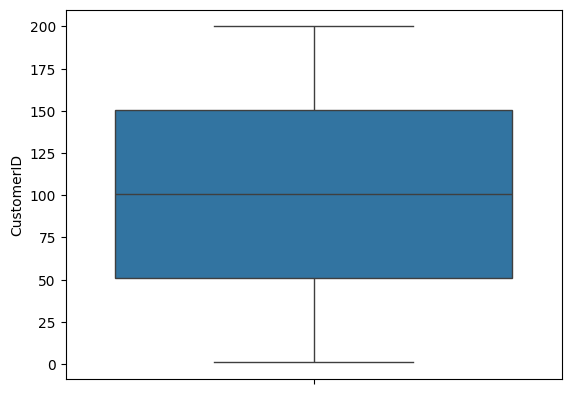

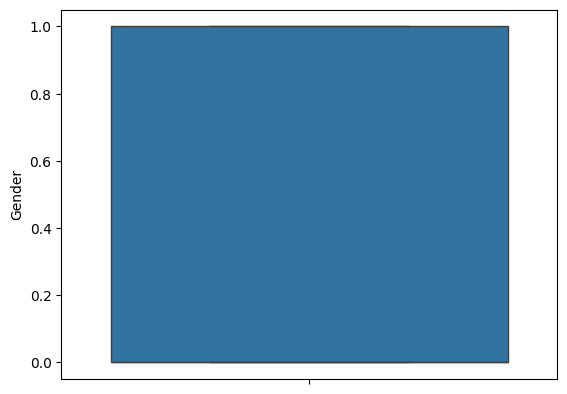

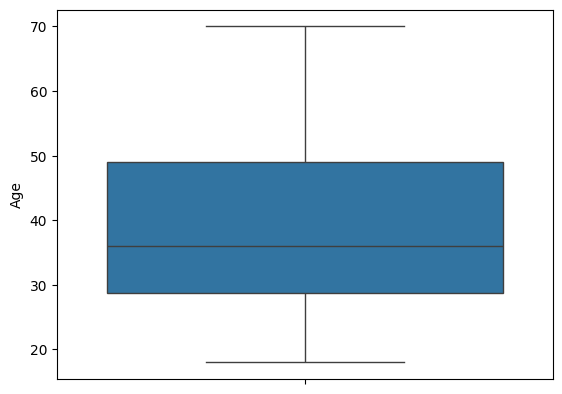

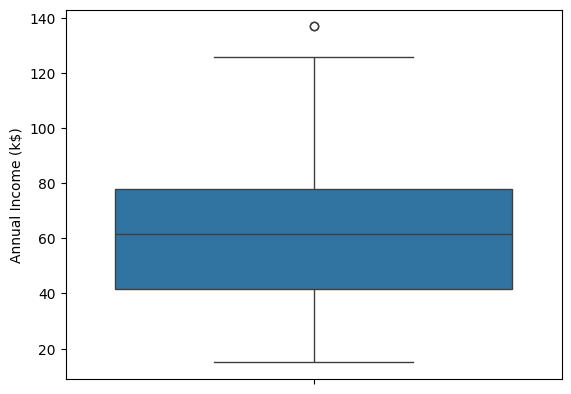

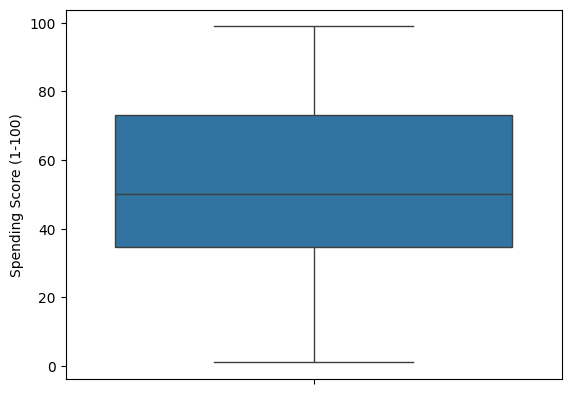

In [16]:
for i in df.columns:
  sns.boxplot(df[i])
  plt.show()

In [17]:
from sklearn.cluster import KMeans

In [99]:
model=KMeans(n_clusters=2)

In [100]:
model.fit(x)

KMeans(n_clusters=2)

In [101]:
model.predict(x)

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0], dtype=int32)

In [102]:
clusters=model.labels_

In [103]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i, random_state=42, n_init='auto')
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

In [104]:
wcss

[103.51565301463079,
 54.050978786613435,
 43.478555965251985,
 34.9217311338733,
 30.39265891845722,
 24.98933139706865,
 20.416373663436882,
 17.14933314235724,
 15.73863409987252,
 13.763928931130119]

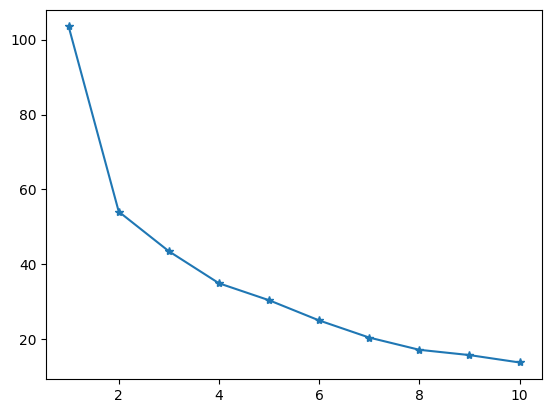

In [105]:
plt.plot(range(1,11),wcss,marker='*')

In [106]:
from sklearn.decomposition import PCA

In [107]:
f=PCA(n_components=2)

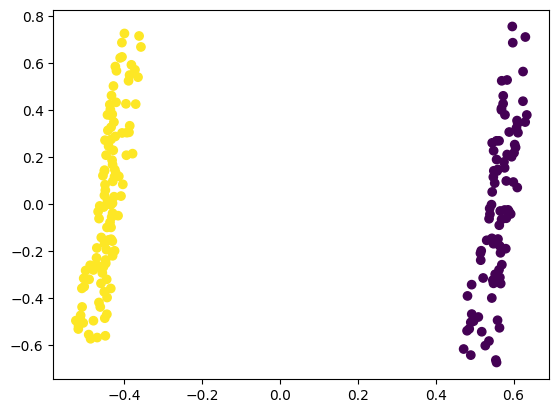

In [108]:
pca_transformed_data = f.fit_transform(x)
plt.scatter(pca_transformed_data[:,0], pca_transformed_data[:,1],c=clusters)

In [109]:
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(x)
score = silhouette_score(x, labels)
print(f"k={2}, Silhouette Score={score:.3f}")


k=2, Silhouette Score=0.351
